In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import PredictionErrorDisplay
from sklearn.tree import export_text

In [152]:
data = pd.read_csv('../data/processed/train_normalized.csv')

data.head()

,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Cognitive_Function,Stress,...,Mental_Health_Poor,Sleep_Excessive,Sleep_Insomnia,Sleep_Normal,Education_High School,Education_Postgraduate,Education_Undergraduate,Income_High,Income_Low,Income_Medium
0,0.275371,1.038967,1.042736,0.895998,1.706424,-1.801746,-1.309503,0.822667,-1.689242,-1.036748,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.468904,0.541260,1.213346,0.250727,-0.448026,-0.681807,-0.988497,0.532521,-1.582326,1.494861,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.361166,-1.776786,-1.072018,-1.228343,0.932303,-1.033680,-1.077411,0.527584,-0.649382,1.454120,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.052537,-1.255681,0.789470,-1.371947,0.594429,0.569177,0.187074,2.286130,-0.739044,-0.302987,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.520137,0.109548,0.086299,0.471165,1.028132,-1.121453,-0.799873,0.381832,-0.924419,-0.556389,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [153]:
column_names = data.columns.tolist()
print(column_names)

['Height', 'Weight', 'Cholesterol', 'BMI', 'Blood_Glucose', 'Bone_Density', 'Vision', 'Hearing', 'Cognitive_Function', 'Stress', 'Pollution', 'Sun_Exposure', 'Age', 'Systolic_BP', 'Diastolic_BP', 'Gender_Female', 'Gender_Male', 'Physical_Activity_High', 'Physical_Activity_Low', 'Physical_Activity_Moderate', 'Smoking_Current', 'Smoking_Former', 'Smoking_Never', 'Alcohol_Frequent', 'Alcohol_Occasional', 'Diet_Balanced', 'Diet_High-fat', 'Diet_Low-carb', 'Diet_Vegetarian', 'Chronic_Diseases_Diabetes', 'Chronic_Diseases_Heart Disease', 'Chronic_Diseases_Hypertension', 'Medication_Occasional', 'Medication_Regular', 'Family_History_Diabetes', 'Family_History_Heart Disease', 'Family_History_Hypertension', 'Mental_Health_Excellent', 'Mental_Health_Fair', 'Mental_Health_Good', 'Mental_Health_Poor', 'Sleep_Excessive', 'Sleep_Insomnia', 'Sleep_Normal', 'Education_High School', 'Education_Postgraduate', 'Education_Undergraduate', 'Income_High', 'Income_Low', 'Income_Medium']


In [154]:
# Loại bỏ 'ages' khỏi danh sách column_names nếu nó tồn tại
columns_excluding_ages = [col for col in column_names if col != 'Age']

# In danh sách các cột trừ 'ages'
print(columns_excluding_ages)


['Height', 'Weight', 'Cholesterol', 'BMI', 'Blood_Glucose', 'Bone_Density', 'Vision', 'Hearing', 'Cognitive_Function', 'Stress', 'Pollution', 'Sun_Exposure', 'Systolic_BP', 'Diastolic_BP', 'Gender_Female', 'Gender_Male', 'Physical_Activity_High', 'Physical_Activity_Low', 'Physical_Activity_Moderate', 'Smoking_Current', 'Smoking_Former', 'Smoking_Never', 'Alcohol_Frequent', 'Alcohol_Occasional', 'Diet_Balanced', 'Diet_High-fat', 'Diet_Low-carb', 'Diet_Vegetarian', 'Chronic_Diseases_Diabetes', 'Chronic_Diseases_Heart Disease', 'Chronic_Diseases_Hypertension', 'Medication_Occasional', 'Medication_Regular', 'Family_History_Diabetes', 'Family_History_Heart Disease', 'Family_History_Hypertension', 'Mental_Health_Excellent', 'Mental_Health_Fair', 'Mental_Health_Good', 'Mental_Health_Poor', 'Sleep_Excessive', 'Sleep_Insomnia', 'Sleep_Normal', 'Education_High School', 'Education_Postgraduate', 'Education_Undergraduate', 'Income_High', 'Income_Low', 'Income_Medium']


In [155]:
# features = [
#     'Cholesterol',
#     'Blood_Glucose',
#     'Bone_Density',
#     'Vision',
#     'Hearing',
#     'Smoking_Current',
#     'Smoking_Former',
#     'Smoking_Never',
#     'Cognitive_Function',
#     'Systolic_BP',
#     'Diastolic_BP'
# ]

In [156]:
features = columns_excluding_ages

In [157]:
data[features+ ['Age']].head(20)

,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Cognitive_Function,Stress,...,Sleep_Excessive,Sleep_Insomnia,Sleep_Normal,Education_High School,Education_Postgraduate,Education_Undergraduate,Income_High,Income_Low,Income_Medium,Age
0,0.275371,1.038967,1.042736,0.895998,1.706424,-1.801746,-1.309503,0.822667,-1.689242,-1.036748,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,89
1,0.468904,0.541260,1.213346,0.250727,-0.448026,-0.681807,-0.988497,0.532521,-1.582326,1.494861,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,77
2,-1.361166,-1.776786,-1.072018,-1.228343,0.932303,-1.033680,-1.077411,0.527584,-0.649382,1.454120,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,70
3,0.052537,-1.255681,0.789470,-1.371947,0.594429,0.569177,0.187074,2.286130,-0.739044,-0.302987,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,52
4,-0.520137,0.109548,0.086299,0.471165,1.028132,-1.121453,-0.799873,0.381832,-0.924419,-0.556389,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,79
5,0.678320,0.543507,-1.445961,0.117016,-1.415571,1.135244,0.916343,-1.335680,0.638295,-0.904545,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,29
6,1.076112,1.064576,0.504986,0.366501,0.183215,-0.799449,-1.309503,1.142607,-1.348483,1.113765,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,76
7,-0.063225,-0.456529,-0.473220,-0.454869,-0.541686,1.547325,1.157597,-0.523291,1.652533,-1.119448,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,26
8,-0.435251,0.142944,-1.219937,0.447725,0.570967,0.260408,0.149447,0.495464,0.072061,-1.580236,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,50
9,-0.403764,-0.627863,1.416890,-0.435403,0.187584,-1.377316,-1.309503,1.299023,-0.514764,0.695166,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,77


<Axes: >

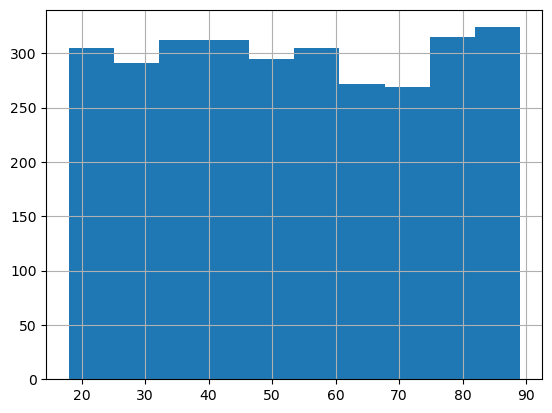

In [158]:
data['Age'].hist()

### Chia tập dữ liệu 70:30

In [159]:
X = data[features]
y = data['Age']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=28)

### chia khoảng cho tuổi

In [161]:
y_train_bins = pd.cut(y_train, bins=5, labels=False)
y_test_bins = pd.cut(y_test, bins=5, labels=False)

### huấn luyện mô hình

In [162]:
model = DecisionTreeRegressor(max_depth=7)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [163]:
y_pred = model.predict(X_test)
y_pred_bins = pd.cut(y_pred, bins=5, labels=False)

### độ chính xác

In [164]:
accuracy = accuracy_score(y_test_bins, y_pred_bins)
precision = precision_score(y_test_bins, y_pred_bins, average='weighted')
recall = recall_score(y_test_bins, y_pred_bins, average='weighted')
f1 = f1_score(y_test_bins, y_pred_bins, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6888888888888889
Precision: 0.6856196244503644
Recall: 0.6888888888888889
F1 Score: 0.6868282367165494


### vẽ cây quyết định

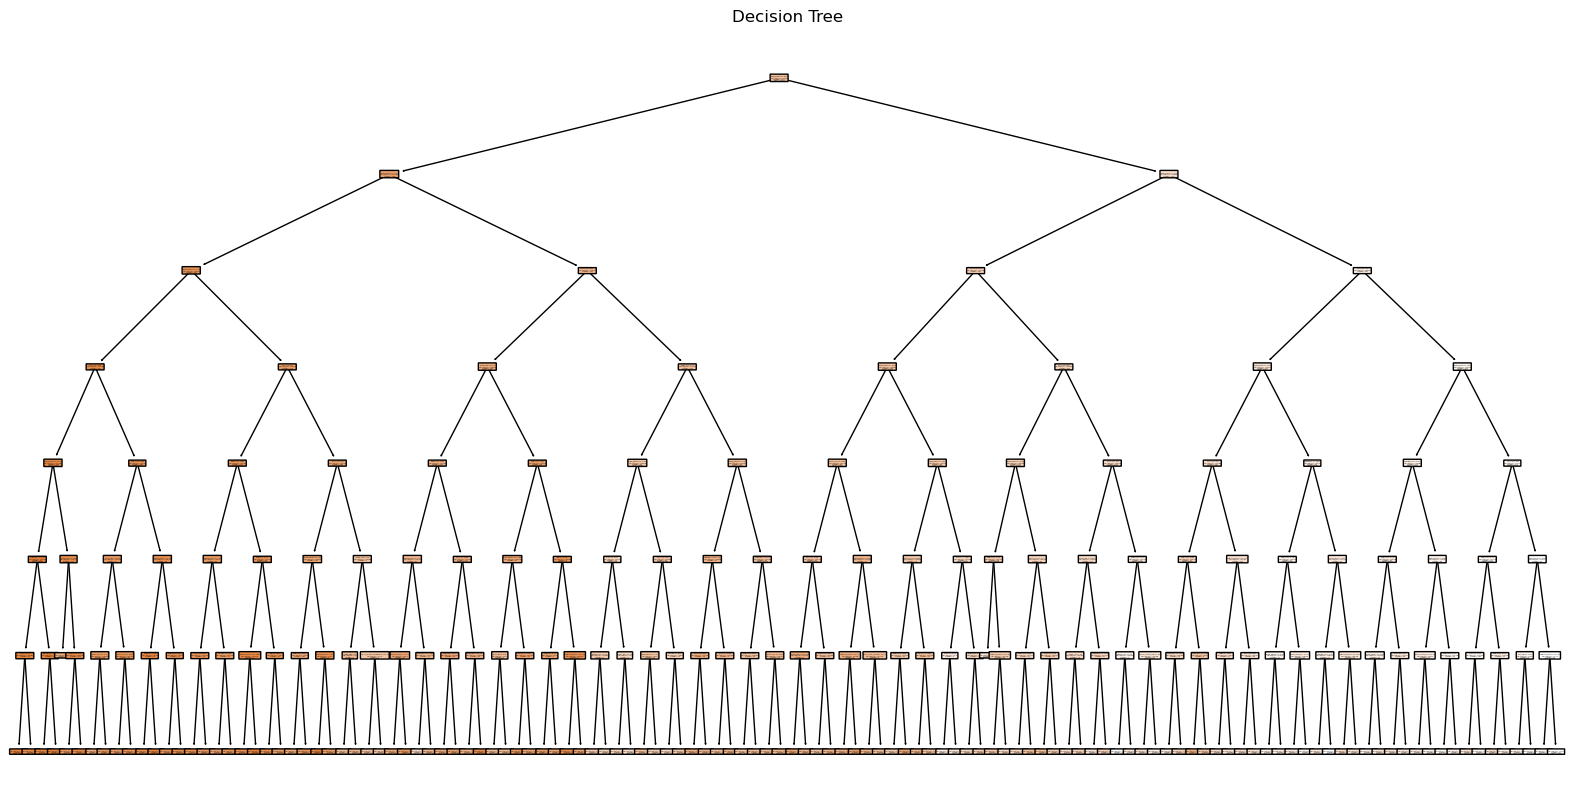

Chi tiết từng node của cây quyết định:
|--- Bone_Density <= 0.02
|   |--- Bone_Density <= -0.65
|   |   |--- Bone_Density <= -1.05
|   |   |   |--- Vision <= -1.27
|   |   |   |   |--- Bone_Density <= -1.52
|   |   |   |   |   |--- Cholesterol <= 0.83
|   |   |   |   |   |   |--- Stress <= 0.80
|   |   |   |   |   |   |   |--- value: [85.26]
|   |   |   |   |   |   |--- Stress >  0.80
|   |   |   |   |   |   |   |--- value: [81.11]
|   |   |   |   |   |--- Cholesterol >  0.83
|   |   |   |   |   |   |--- Pollution <= -1.26
|   |   |   |   |   |   |   |--- value: [84.88]
|   |   |   |   |   |   |--- Pollution >  -1.26
|   |   |   |   |   |   |   |--- value: [87.24]
|   |   |   |   |--- Bone_Density >  -1.52
|   |   |   |   |   |--- Systolic_BP <= -1.35
|   |   |   |   |   |   |--- value: [63.00]
|   |   |   |   |   |--- Systolic_BP >  -1.35
|   |   |   |   |   |   |--- Hearing <= -0.22
|   |   |   |   |   |   |   |--- value: [74.71]
|   |   |   |   |   |   |--- Hearing >  -0.22
|   |   

In [165]:
plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=features,
    filled=True,
    rounded=True
)
plt.title("Decision Tree")
plt.show()

tree_rules = export_text(model, feature_names=features)
print("Chi tiết từng node của cây quyết định:")
print(tree_rules)

### Ma trận nhầm lẫn

[[143  31   0   0   0]
 [ 31 131  42   0   0]
 [  2  46 116  35   1]
 [  0   2  33  87  34]
 [  0   0   0  23 143]]


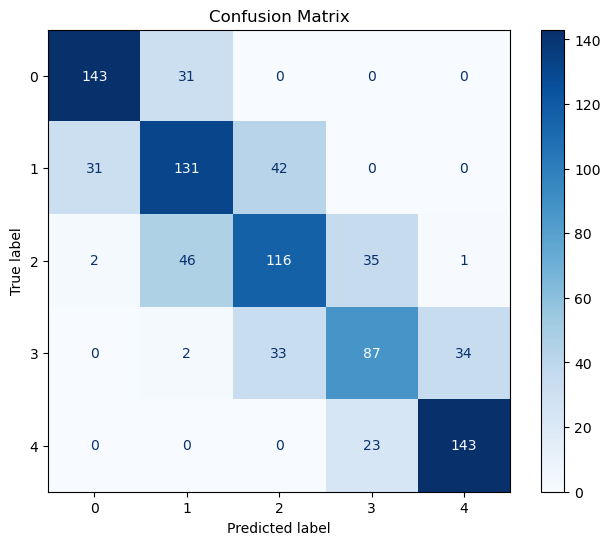

In [166]:
cm = confusion_matrix(y_test_bins, y_pred_bins)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(cls) for cls in range(5)])
print(cm)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()

### Xem độ quan trọng của các features


Feature Importances:
                           Feature  Importance
5                     Bone_Density    0.913309
6                           Vision    0.055902
7                          Hearing    0.010994
12                     Systolic_BP    0.004196
2                      Cholesterol    0.003105
13                    Diastolic_BP    0.002370
4                    Blood_Glucose    0.002277
8               Cognitive_Function    0.001388
21                   Smoking_Never    0.001328
9                           Stress    0.000887
10                       Pollution    0.000780
1                           Weight    0.000771
0                           Height    0.000615
47                      Income_Low    0.000468
3                              BMI    0.000408
37              Mental_Health_Fair    0.000392
42                    Sleep_Normal    0.000172
38              Mental_Health_Good    0.000160
20                  Smoking_Former    0.000128
16          Physical_Activity_High    

C:\Users\Illya\AppData\Local\Temp\ipykernel_17592\666565990.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


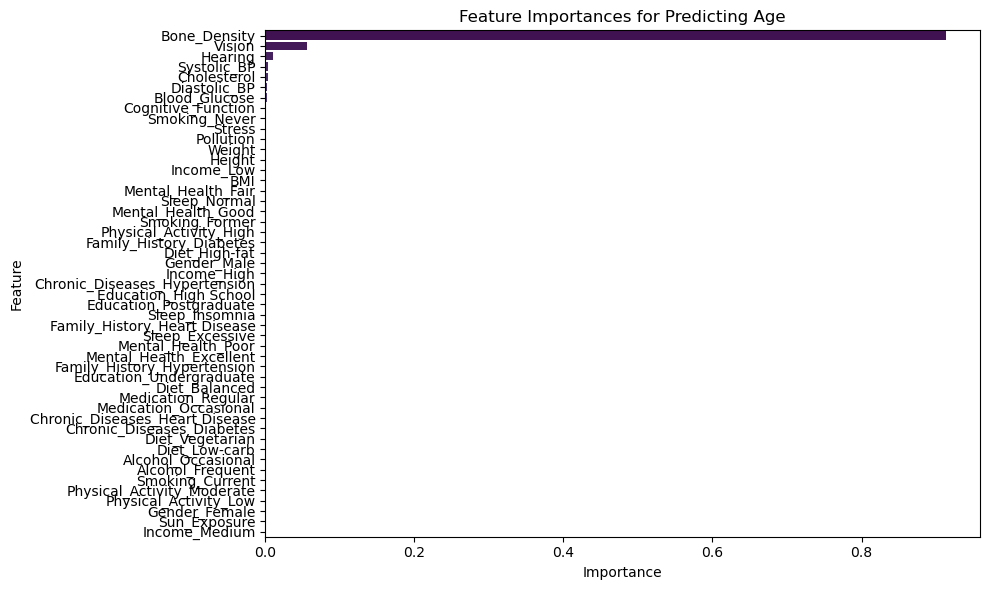

In [167]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importances for Predicting Age")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

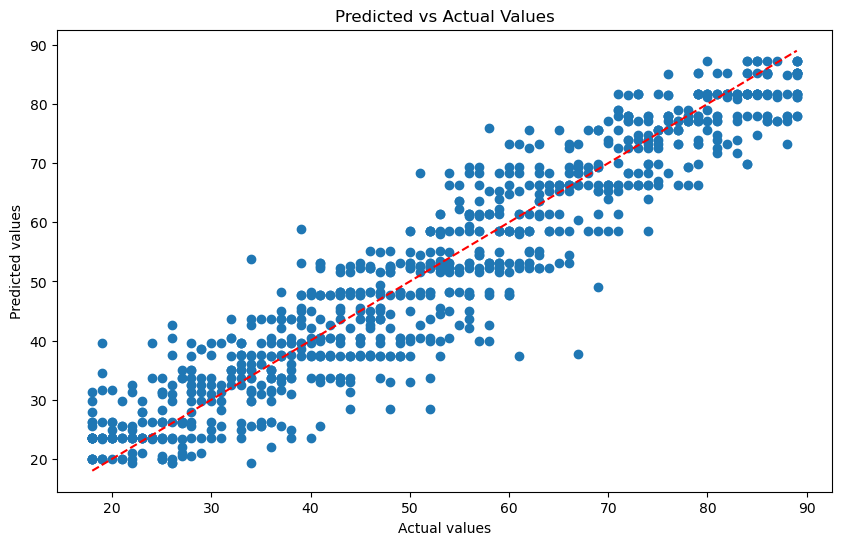

In [168]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

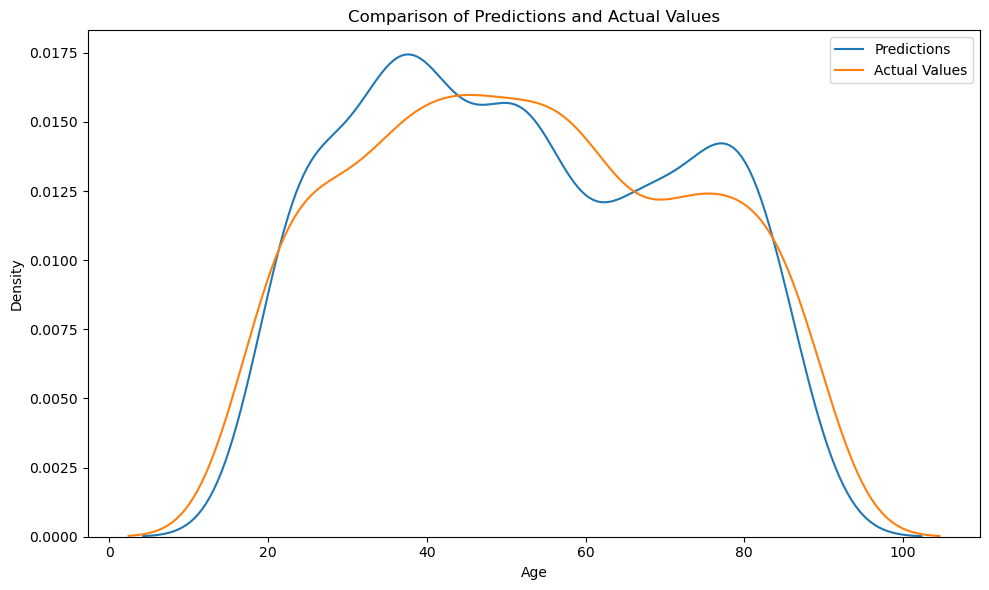

In [169]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_pred, label='Predictions')
sns.kdeplot(y_test, label='Actual Values')
plt.title('Comparison of Predictions and Actual Values')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [170]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

### Tạo scorer cho từng metric

In [171]:
mse_scorer = 'neg_mean_squared_error'
mae_scorer = 'neg_mean_absolute_error'
r2_scorer = 'r2'

### Đánh giá mô hình bằng cross_val_score

In [172]:
mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
mae_scores = cross_val_score(model, X, y, cv=kf, scoring=mae_scorer)
r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)

In [173]:
mse_scores = -mse_scores
rmse_scores = np.sqrt(mse_scores)
mae_scores = -mae_scores

In [174]:
# Tạo DataFrame cho scores
mse_scores_df = pd.DataFrame(mse_scores, columns=['MSE'])
rmse_scores_df = pd.DataFrame(rmse_scores, columns=['RMSE'])
mae_scores_df = pd.DataFrame(mae_scores, columns=['MAE'])
r2_scores_df = pd.DataFrame(r2_scores, columns=['R2'])

# Kết hợp các score vào một DataFrame
score = pd.concat([mse_scores_df, rmse_scores_df, mae_scores_df, r2_scores_df], axis=1)

# Hiển thị các score
print(score)

# Thống kê các score
print("Summary statistics:")
print(score.describe())


         MSE      RMSE       MAE        R2
0  42.123644  6.490273  5.145284  0.896724
1  39.156358  6.257504  4.991894  0.913448
2  42.491654  6.518562  5.121109  0.896927
3  43.002865  6.557657  5.133950  0.904840
4  44.976269  6.706435  5.259623  0.885575
Summary statistics:
             MSE      RMSE       MAE        R2
count   5.000000  5.000000  5.000000  5.000000
mean   42.350158  6.506086  5.130372  0.899503
std     2.097271  0.162017  0.095135  0.010384
min    39.156358  6.257504  4.991894  0.885575
25%    42.123644  6.490273  5.121109  0.896724
50%    42.491654  6.518562  5.133950  0.896927
75%    43.002865  6.557657  5.145284  0.904840
max    44.976269  6.706435  5.259623  0.913448


In [175]:
print(f"Average MSE across {k} folds: {mse_scores.mean():.4f} +- {mse_scores.std():.4f}")
print(f"Average RMSE across {k} folds: {rmse_scores.mean():.4f} +- {rmse_scores.std():.4f}")
print(f"Average MAE across {k} folds: {mae_scores.mean():.4f} +- {mae_scores.std():.4f}")
print(f"Average R2 across {k} folds: {r2_scores.mean():.4f} +- {r2_scores.std():.4f}") 

Average MSE across 5 folds: 42.3502 +- 1.8759
Average RMSE across 5 folds: 6.5061 +- 0.1449
Average MAE across 5 folds: 5.1304 +- 0.0851
Average R2 across 5 folds: 0.8995 +- 0.0093


### Nhận xét:
- MSE đo lường mức độ sai lệch giữa dự đoán và thực tế, càng về gần 0 thì càng chính xác. Tại đây 0.2852 tạm ổn
- RMSE là căn bậc 2 của MSE. Ta thấy độ lệch chuẩn nhỏ 0.0138 suy ra kết quả ổn định
- MAE là mức độ sai số trung bình tuyệt đối. giá trị thấp cho thấy mô hình dự đoán khá hiệu quả
- R2 là chỉ số đánh giá độ phù hợp của mô hình. Với giá trị mục tiêu là 1 được xem là chuẩn thì giá trị 0.8577 cho thấy mô hình có khả năng giải thích 85.77% sự biến thiên trong dữ liệu đầu ra, thể hiện sự hiệu quả